# INTRODUCTION TO THE MATPLOTLIB MODULE

In [2]:
import matplotlib.pyplot as plt, numpy as np
plt.style.use(['science','notebook','grid', 'dark_background'])

## SECTION 1: QUICK PLOTTING LINE GRAPHS AND HISTOGRAMS

### SIMPLE LINE PLOT

In [3]:
x = np.linspace(0, 15, 30)

y1 = np.sin(x) + 0.1 * np.random.randn(len(x))
y2 = np.sin(x)

(-1.5, 1.1025474931660382)

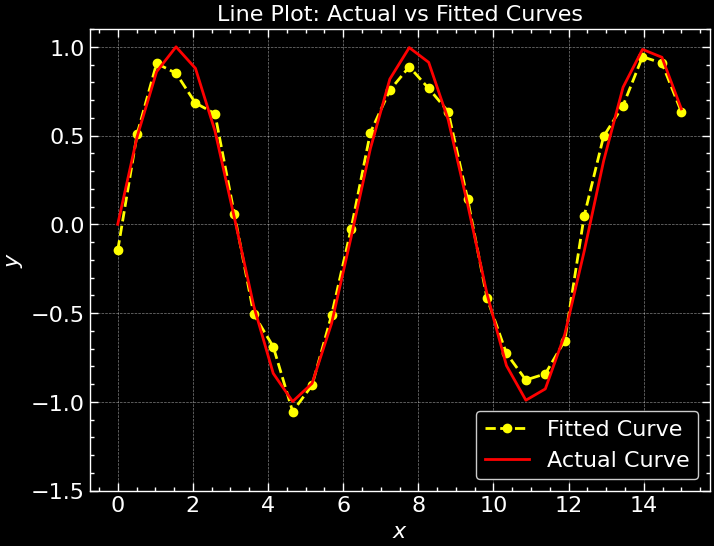

In [6]:
plt.plot(x, y1, 'o--', color = 'yellow', label = 'Fitted Curve')
plt.plot(x, y2, '-', color = 'red', label = 'Actual Curve')

plt.legend(loc = 'lower right')
plt.title('Line Plot: Actual vs Fitted Curves')
plt.xlabel('$x$')
plt.ylabel('$y$')

plt.ylim(bottom = -1.5)

### SUBPLOTS OF A DOUBLE HISTORGRAM

Text(0.5, 1.0, 'Double Histogram')

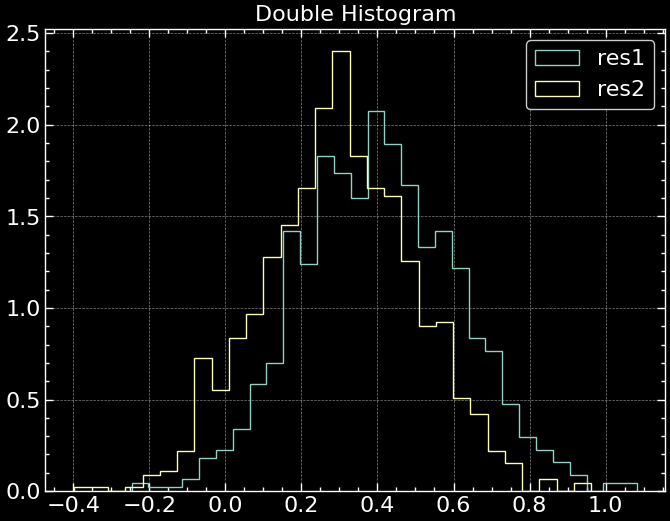

In [7]:
res1 = np.random.randn(1000) * 0.2 + 0.4
res2 = np.random.randn(1000) * 0.2 + 0.3

# THESE PLOT TWO TRANSPARENT HISTOGRAMS WHOSE INDIVISUAL AREAS SUM TO UNITY:

plt.hist(res1, bins = 30, density = True, histtype = 'step')
plt.hist(res2, bins = 30, density = True, histtype = 'step')
plt.legend(['res1', 'res2'], loc = 'upper right')
plt.title('Double Histogram')

### PROBLEM 1: CREATE THE FOLLOWING PLOT

In [8]:
res_a1 = 0.2 * np.random.randn(1000) + 0.4
res_b1 = 0.25 * np.random.randn(1000) + 0.4
res_a2 = 0.21 * np.random.randn(1000) + 0.3
res_b2 = 0.22 * np.random.randn(1000) + 0.3

In [9]:
# STANDARD DEVIATIONS IN LATEX FOR TRIALS 1 AND 2:

text_str1 = '\n'.join((r'$\sigma_a = %.4f$' % (
    np.std(res_a1)), r'$\sigma_b = %.4f$' % (np.std(res_b1))))
text_str2 = '\n'.join((r'$\sigma_a = %.4f$' % (
    np.std(res_a2)), r'$\sigma_b = %.4f$' % (np.std(res_b2))))

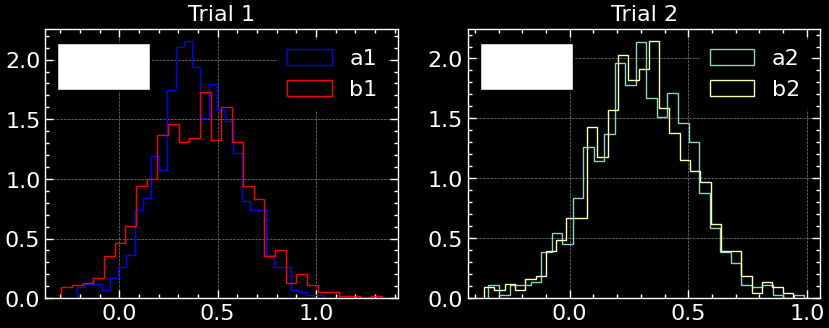

In [11]:
fig, axes = plt.subplots(1, 2, figsize = (10, 3.5))

# TRIAL 1:

ax = axes[0]  # 1-D ARRAY

ax.hist(res_a1, bins = 30, density = True,
        histtype = 'step', label = 'a1', color = 'blue')
ax.hist(res_b1, bins = 30, density = True,
        histtype = 'step', label = 'b1', color = 'red')
ax.legend(loc = 'upper right', fancybox = False, edgecolor = 'black')
ax.set_title('Trial 1')

ax.text(0.05, 0.81, text_str1, transform=ax.transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))

# TRIAL 2:

ax = axes[1]

ax.hist(res_a2, bins=30, density=True, histtype='step', label='a2')
ax.hist(res_b2, bins=30, density=True, histtype='step', label='b2')
ax.legend(loc='upper right', fancybox=False, edgecolor='black')
ax.set_title('Trial 2')

ax.text(0.05, 0.81, text_str2, transform=ax.transAxes,
        bbox=dict(facecolor='white', edgecolor='black'))
plt.show()

## SECTION 2: 2-VARIABLE PLOTS

### FILLED-IN CONTOUR PLOTS:

In [12]:
x = np.linspace(0, 2, 1000)
y = np.linspace(0, 2, 1000)

x_v, y_v = np.meshgrid(x, y)
f = np.exp(-(x_v ** 2 + x_v ** y_v)) * np.exp(x_v)

Text(0, 0.5, '$y$')

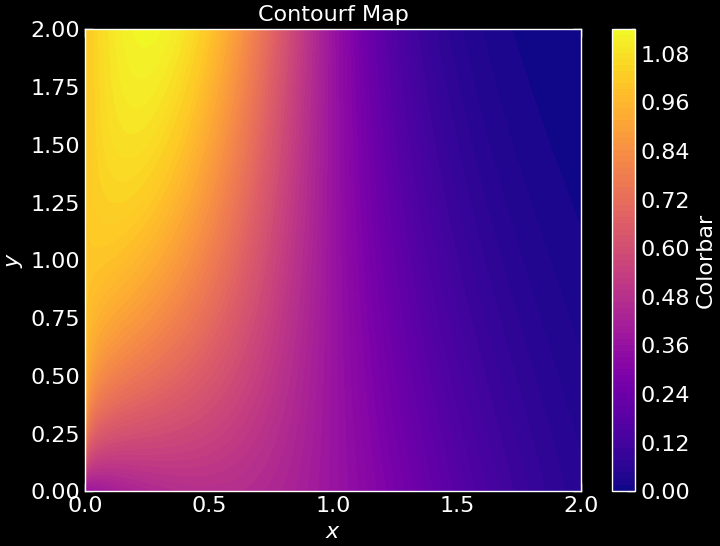

In [13]:
plt.contourf(x_v, y_v, f, levels = 100, cmap = 'plasma')
plt.colorbar(label = 'Colorbar')
plt.title('Contourf Map')
plt.xlabel('$x$')
plt.ylabel('$y$')

### TRUE CONTOUR PLOTS:

Text(0, 0.5, '$y$')

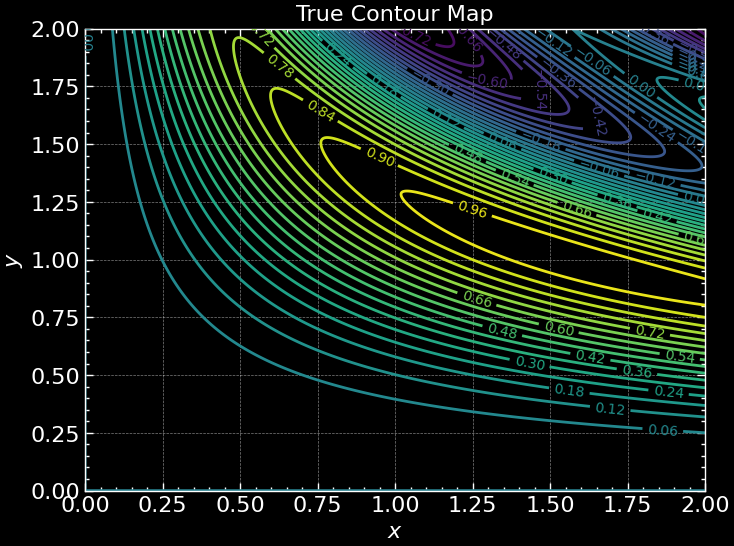

In [14]:
z = np.sin(x_v * y_v ** 2) * np.sin(x_v * y_v)
cs = plt.contour(x_v, y_v, z, levels = 30)

plt.clabel(cs, fontsize = 10)
plt.title('True Contour Map')
plt.xlabel('$x$')
plt.ylabel('$y$')

## SECTION 3: PLOTTING VECTOR FIELDS USING STREAMPLOT

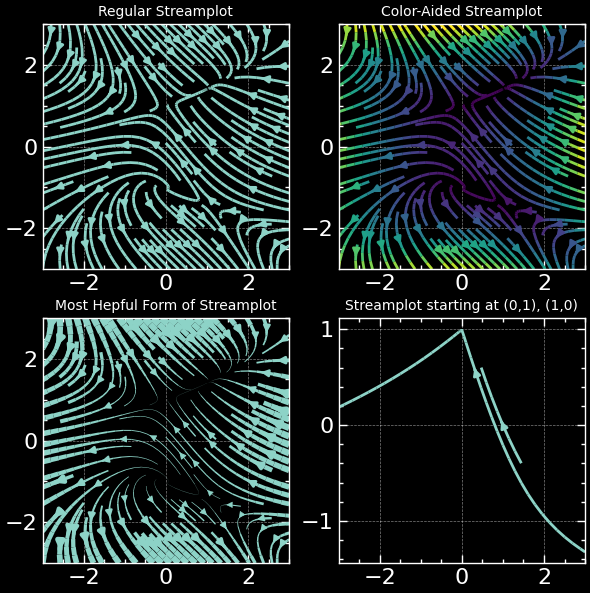

In [15]:
_ = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(_, _)
U = -1 - X ** 2 + Y ** 2
V = 1 + X - Y ** 2

speed = np.sqrt(U ** 2 + V ** 2)
fig, axes = plt.subplots(2, 2, figsize = (7, 7))

ax = axes[0][0]
ax.streamplot(X, Y, U, V)
ax.set_title('Regular Streamplot', fontsize = 10)

ax = axes[0][1]
ax.streamplot(X, Y, U, V, color = speed) 
ax.set_title('Color-Aided Streamplot', fontsize = 10)

ax = axes[1][0]
lw = 5 * speed / speed.max()
ax.streamplot(X, Y, U, V, linewidth = lw)
ax.set_title('Most Hepful Form of Streamplot', fontsize = 10)

ax = axes[1][1]
seedpoints = np.array([[0, 1], [1, 0]])
ax.streamplot(X, Y, U, V, start_points = seedpoints)
ax.set_title('Streamplot starting at (0,1), (1,0)', fontsize = 10)

plt.show()